Heart Disease Prediction based from [GeeksForGeeks](https://www.geeksforgeeks.org/machine-learning/ml-heart-disease-prediction-using-logistic-regression/)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation

In [2]:
data = pd.read_csv("dataset/framingham.csv")
data.drop(columns=['education'], inplace = True, axis = 1)
data.rename(columns={'male':'Sex_male'}, inplace=True)

data.dropna(axis=0, inplace=True)
data

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
print(data.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


Splitting into test and train sets

In [4]:
x = np.asarray(data[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(data['TenYearCHD'])

x = preprocessing.StandardScaler().fit(x).transform(x)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (3000, 6) (3000,)
Test set: (751, 6) (751,)


Exploratory Data Analysis (EDA)

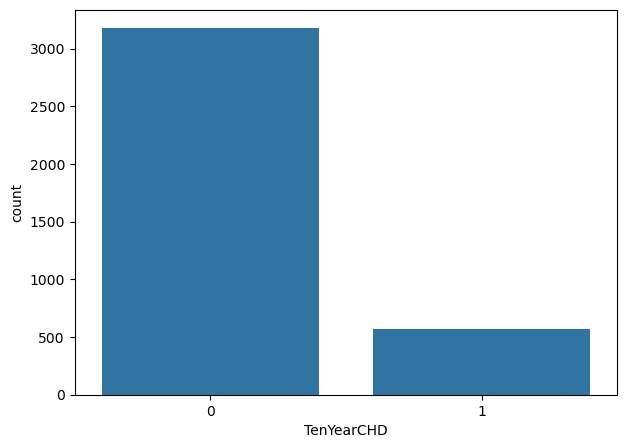

In [ ]:
# Ten year's CHD (Coronary Heart Disease) record of all patients in the dataset
# 0: do not have CHD, 1: have CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=data)
plt.show()

Finding 1: Most patients in the project's dataset does not have coronary heart disease, about 500 patients have CHD.

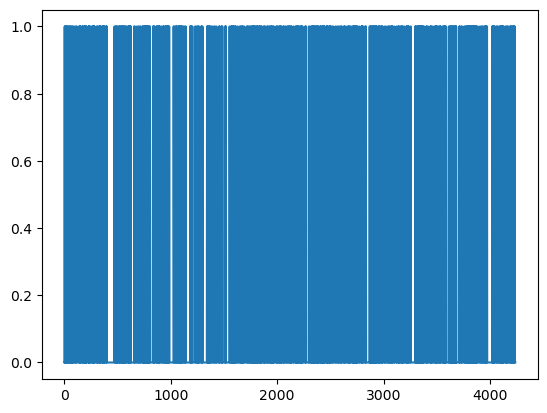

In [7]:
# number of patients affected by CHD (0: unaffected, 1: affected)
chd_presence = data['TenYearCHD'].plot()
plt.show(chd_presence)

Presence of heart disease is represented by the gaps.
Blue lines indicate absence of heart disease.